In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import statistics 

C:\Users\17857\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


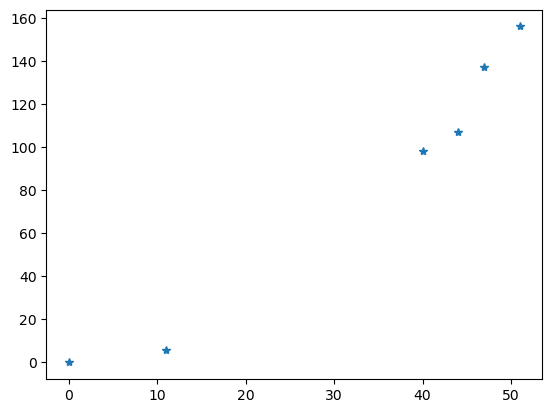

In [2]:
GC = pd.read_csv('data\gaines_case.csv')
y_case = GC['Cumulative Cases'].to_numpy()
x_case = GC['t'].to_numpy()
plt.plot(x_case,y_case, '*')

In [3]:
#define paramters 
#VE for three age group epsilon 
epsilon=[0.93, 0.97, 0.97]

#Exposed to infectious rate, sigma
sigma_ub=float(1/7)
sigma_lb=float(1/14)
sigma_pe=(sigma_ub+sigma_lb)/2

#I to R rate, gamma 1
gamma1_ub=float(1/4)
gamma1_lb=float(1/7)
gamma1_pe=(gamma1_ub+gamma1_lb)/2

#H to R rate, gamma 2 
gamma2_ub=float(1/5)
gamma2_lb=float(1/6)
gamma2_pe=(gamma2_ub+gamma2_lb)/2

#IHR
IHR_ub=[gamma1_ub*0.29/(1-0.29),gamma1_ub*0.13/(1-0.13),gamma1_ub*0.17/(1-0.17)]
IHR_lb=[gamma1_lb*0.29/(1-0.29),gamma1_lb*0.13/(1-0.13),gamma1_lb*0.17/(1-0.17)]
IHR_pe=[(IHR_ub[0]+IHR_lb[0])/2,(IHR_ub[1]+IHR_lb[1])/2,(IHR_ub[2]+IHR_lb[2])/2]

#HDR
HDR_ub=[gamma2_ub*(0.3/29)/(1-(0.3/29)),gamma2_ub*(0.3/13)/(1-(0.3/13)),gamma2_ub*(0.3/17)/(1-(0.3/17))]
HDR_lb=[gamma2_lb*(0.1/29)/(1-(0.1/29)),gamma2_lb*(0.1/13)/(1-(0.1/13)),gamma2_lb*(0.1/17)/(1-(0.1/17))]
HDR_pe=[(HDR_ub[0]+HDR_lb[0])/2,(HDR_ub[1]+HDR_lb[1])/2,(HDR_ub[2]+HDR_lb[2])/2]

#contact matrix
CM=[[1.4101, 2.5282, 4.91],[ 0.9290, 11.0091, 6.0771], [0.4884, 1.6387, 8.8461]]

In [4]:
CM[1][2]

6.0771

In [5]:
def computerate(i, CWW, aW, I, Ni):
    rate = 0
    for n in range(3):
        rate += aW*CWW[i][n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

In [6]:
#Import county data

#Total population at age group 0-4, 5-19, 20+ N
N=[2341, 6500, 13682]
V=[1988, 4536, 11616]
theta=1.04



In [8]:
def sim_fit(x, beta0, beta1, beta2):
    Nd=200
    dt=1
    N=[2341, 6500, 13682]
    V=[1988, 4536, 11616]
    theta=1.04

    S = np.zeros([3])
    E = np.zeros([3])
    I = np.zeros([3])
    R = np.zeros([3])
    H = np.zeros([3])
    D = np.zeros([3])
    
    S_new = np.zeros([3])
    E_new = np.zeros([3])
    I_new = np.zeros([3])
    R_new = np.zeros([3])
    H_new = np.zeros([3])
    D_new = np.zeros([3])
    V_new = np.zeros([3])
    
    case_count=0
    hosp_count=0
    death_count=0
    case_count0=0
    hosp_count0=0
    death_count0=0
    case_count1=0
    hosp_count1=0
    death_count1=0
    case_count2=0
    hosp_count2=0
    death_count2=0
    
    cumcase=np.zeros([Nd])
    cumhosp=np.zeros([Nd])
    cumdeath=np.zeros([Nd])
    cumcase0=np.zeros([Nd])
    cumhosp0=np.zeros([Nd])
    cumdeath0=np.zeros([Nd])
    cumcase1=np.zeros([Nd])
    cumhosp1=np.zeros([Nd])
    cumdeath1=np.zeros([Nd])
    cumcase2=np.zeros([Nd])
    cumhosp2=np.zeros([Nd])
    cumdeath2=np.zeros([Nd])
    cumI=np.zeros([Nd])
    cumH=np.zeros([Nd])
    cumD=np.zeros([Nd])
    
    for n in range(3):
        S[n]=N[n]-V[n]
    I[1]=1
    
    sig=sigma_pe
    gam1=gamma1_pe
    gam2=gamma2_pe
    IHR=IHR_pe
    HDR=HDR_pe
    
    for tt in range(int(Nd/dt)):
        for i in range(3):
            if i==0:
                beta=beta0
                eps=epsilon[0]
                ihr=IHR[0]
                hdr=HDR[0]
                the=theta
            if i==1:
                beta=beta1
                eps=epsilon[1]
                ihr=IHR[1]
                hdr=HDR[1]
                the=0
            if i==2:
                beta=beta2
                eps=epsilon[2]
                ihr=IHR[2]
                hdr=HDR[2]
                the=0
            S_new[i]=S[i]-beta*computerate(i, CM, 1, I, N)*S[i]
            V_new[i]=V[i]-beta*computerate(i, CM, 1, I, N)*V[i]*(1-eps)+the
            E_new[i]=E[i]+beta*computerate(i, CM, 1, I, N)*S[i]+beta*computerate(i, CM, 1, I, N)*V[i]*(1-eps)-sig*E[i]
            I_new[i]=I[i]+sig*E[i]-(ihr+gam1)*I[i]
            case_count=case_count+sig*E[i]
            cumcase[tt]=case_count
            H_new[i]=H[i]+ihr*I[i]-(hdr+gam2)*H[i]
            hosp_count=hosp_count+ihr*I[i]
            cumhosp[tt]=hosp_count
            R_new[i]=R[i]+gam1*I[i]+gam2*H[i]
            D_new[i]=D[i]+hdr*H[i]
            death_count=death_count+hdr*H[i]
            cumdeath[tt]=death_count
            if i==0:
                case_count0=case_count0+sig*E[i]
                cumcase0[tt]=case_count0
                hosp_count0=hosp_count0+ihr*I[i]
                cumhosp0[tt]=hosp_count0
                death_count0=death_count0+hdr*H[i]
                cumdeath0[tt]=death_count0
            if i==1:
                case_count1=case_count1+sig*E[i]
                cumcase1[tt]=case_count1
                hosp_count1=hosp_count1+ihr*I[i]
                cumhosp1[tt]=hosp_count1
                death_count1=death_count1+hdr*H[i]
                cumdeath1[tt]=death_count1
            if i==2:
                case_count2=case_count2+sig*E[i]
                cumcase2[tt]=case_count2
                hosp_count2=hosp_count2+ihr*I[i]
                cumhosp2[tt]=hosp_count2
                death_count2=death_count2+hdr*H[i]
                cumdeath2[tt]=death_count2
            
        
        S = S_new; V=V_new; E=E_new; I=I_new; H=H_new; R=R_new; D=D_new;
        cumI[tt]=np.sum(I)
        cumH[tt]=np.sum(H)
        cumD[tt]=np.sum(D)
    
    fit_case=[cumcase[0],cumcase[11], cumcase[40], cumcase[44],cumcase[47],cumcase[51],100*sum(cumcase0)/sum(cumcase),100*sum(cumcase1)/sum(cumcase),100*sum(cumcase2)/sum(cumcase)]
    return fit_case         

In [12]:
sim_fit(0, 1.46876795, 0.09924236, 0.06988435)

[0.0,
 3.198974451807622,
 70.65995240140795,
 99.57119928490505,
 127.68097243647564,
 175.66121873388823,
 38.14640343494541,
 45.49498378768403,
 16.358612777370524]

In [10]:
from scipy.optimize import curve_fit

In [11]:
xdata = np.linspace(0, 9, 9)
y_prop=[100*0.34,100*0.48,100*0.18]
y_array = np.concatenate((y_case, y_prop))
ydata = y_array
popt, pcov = curve_fit(sim_fit, xdata, ydata, p0 = [ 0.3, 0.3, 0.3], bounds=([ 0, 0, 0],[10,10,10]))
print(popt)
print(pcov)

[1.46876795 0.09924236 0.06988435]
[[ 2.60378762e-01 -1.67244292e-02 -4.98716500e-03]
 [-1.67244292e-02  1.16232305e-03 -1.06265548e-04]
 [-4.98716500e-03 -1.06265548e-04  2.32006618e-03]]


In [13]:
x1,x2,x3= popt[0],popt[1],popt[2]
z1,z2,z3= pcov[0][0],pcov[1][1],pcov[2][2]
V_base=[1988, 4536, 11616]
V_low=[1636, 3735, 11616]
V_high=[2283, 5206, 13334]

In [14]:
def sim_sto(x, beta0, beta1, beta2,std0, std1, std2,V_input):
    Nd=53
    dt=1
    N=[2341, 6500, 13682]
    V=V_input
    theta=1.04

    S = np.zeros([3])
    E = np.zeros([3])
    I = np.zeros([3])
    R = np.zeros([3])
    H = np.zeros([3])
    D = np.zeros([3])
    
    S_new = np.zeros([3])
    E_new = np.zeros([3])
    I_new = np.zeros([3])
    R_new = np.zeros([3])
    H_new = np.zeros([3])
    D_new = np.zeros([3])
    V_new = np.zeros([3])
    
    case_count=0
    hosp_count=0
    death_count=0
    case_count0=0
    hosp_count0=0
    death_count0=0
    case_count1=0
    hosp_count1=0
    death_count1=0
    case_count2=0
    hosp_count2=0
    death_count2=0
    
    cumcase=np.zeros([Nd])
    cumhosp=np.zeros([Nd])
    cumdeath=np.zeros([Nd])
    cumcase0=np.zeros([Nd])
    cumhosp0=np.zeros([Nd])
    cumdeath0=np.zeros([Nd])
    cumcase1=np.zeros([Nd])
    cumhosp1=np.zeros([Nd])
    cumdeath1=np.zeros([Nd])
    cumcase2=np.zeros([Nd])
    cumhosp2=np.zeros([Nd])
    cumdeath2=np.zeros([Nd])
    cumI=np.zeros([Nd])
    cumH=np.zeros([Nd])
    cumD=np.zeros([Nd])
    
    for n in range(3):
        S[n]=N[n]-V[n]
    I[1]=1
    
        
    for tt in range(int(Nd/dt)):
        np.random.seed()
        sig=np.random.uniform(sigma_lb,sigma_ub)
        gam1=np.random.uniform(gamma1_lb,gamma1_ub)
        gam2=np.random.uniform(gamma2_lb,gamma2_ub)
        IHR=[np.random.uniform(IHR_lb[0],IHR_ub[0]),np.random.uniform(IHR_lb[1],IHR_ub[1]),np.random.uniform(IHR_lb[2],IHR_ub[2])]
        HDR=[np.random.uniform(HDR_lb[0],HDR_ub[0]),np.random.uniform(HDR_lb[1],HDR_ub[1]),np.random.uniform(HDR_lb[2],HDR_ub[2])]

        for i in range(3):
            if i==0:
                rnd=np.random.normal(0, std0, 1)
                beta=beta0+2*rnd
                eps=epsilon[0]
                ihr=IHR[0]
                hdr=HDR[0]
                the=theta
            if i==1:
                rnd=np.random.normal(0, std1, 1)
                beta=beta1+2*rnd
                eps=epsilon[1]
                ihr=IHR[1]
                hdr=HDR[1]
                the=0
            if i==2:
                rnd=np.random.normal(0, std2, 1)
                beta=beta2+2*rnd
                eps=epsilon[2]
                ihr=IHR[2]
                hdr=HDR[2]
                the=0
            S_new[i]=S[i]-beta*computerate(i, CM, 1, I, N)*S[i]
            V_new[i]=V[i]-beta*computerate(i, CM, 1, I, N)*V[i]*(1-eps)+the
            E_new[i]=E[i]+beta*computerate(i, CM, 1, I, N)*S[i]+beta*computerate(i, CM, 1, I, N)*V[i]*(1-eps)-sig*E[i]
            I_new[i]=I[i]+sig*E[i]-(ihr+gam1)*I[i]
            case_count=case_count+sig*E[i]
            cumcase[tt]=case_count
            H_new[i]=H[i]+ihr*I[i]-(hdr+gam2)*H[i]
            hosp_count=hosp_count+ihr*I[i]
            cumhosp[tt]=hosp_count
            R_new[i]=R[i]+gam1*I[i]+gam2*H[i]
            D_new[i]=D[i]+hdr*H[i]
            death_count=death_count+hdr*H[i]
            cumdeath[tt]=death_count
            if i==0:
                case_count0=case_count0+sig*E[i]
                cumcase0[tt]=case_count0
                hosp_count0=hosp_count0+ihr*I[i]
                cumhosp0[tt]=hosp_count0
                death_count0=death_count0+hdr*H[i]
                cumdeath0[tt]=death_count0
            if i==1:
                case_count1=case_count1+sig*E[i]
                cumcase1[tt]=case_count1
                hosp_count1=hosp_count1+ihr*I[i]
                cumhosp1[tt]=hosp_count1
                death_count1=death_count1+hdr*H[i]
                cumdeath1[tt]=death_count1
            if i==2:
                case_count2=case_count2+sig*E[i]
                cumcase2[tt]=case_count2
                hosp_count2=hosp_count2+ihr*I[i]
                cumhosp2[tt]=hosp_count2
                death_count2=death_count2+hdr*H[i]
                cumdeath2[tt]=death_count2
            
        
        S = S_new; V=V_new; E=E_new; I=I_new; H=H_new; R=R_new; D=D_new;
        cumI[tt]=np.sum(I)
        cumH[tt]=np.sum(H)
        cumD[tt]=np.sum(D)
    
    fit_case=[cumcase[0],cumcase[11], cumcase[40], cumcase[44],100*sum(cumcase0)/sum(cumcase),100*sum(cumcase1)/sum(cumcase),100*sum(cumcase2)/sum(cumcase)]
    return fit_case, cumI, cumH, cumD, cumcase, cumhosp, cumdeath, cumcase0, cumhosp0, cumcase1, cumhosp1, cumcase2, cumhosp2
    

In [15]:
sim_sto(0, x1, x2, x3, z1, z2, z3, V_base)

([0.0,
  2.9609055373521973,
  77.58519012389736,
  108.8977395389408,
  57.99480968565887,
  33.74580601731779,
  8.259384297023301],
 array([ 0.75625658,  0.7045536 ,  0.69397028,  0.682438  ,  0.66850108,
         0.76134776,  0.8775056 ,  0.96797971,  1.02041204,  1.19847807,
         1.30188728,  1.50062512,  1.58651777,  1.75259526,  1.90716841,
         2.36687549,  2.82544626,  3.34978721,  3.68560098,  4.06836655,
         4.69167032,  5.10440567,  4.93621104,  4.70762132,  5.54012509,
         5.8619771 ,  5.87024636,  7.6015692 ,  9.13385744,  9.30619074,
         9.84852399, 10.59300078, 11.71147984, 12.20576441, 12.54760224,
        13.72007718, 14.1444482 , 16.19490235, 15.71571136, 18.72734808,
        19.0501725 , 20.41297686, 22.41218891, 24.69993632, 28.11368263,
        31.13701322, 33.77026195, 31.18436304, 30.81476438, 33.65934447,
        36.37626728, 39.75163062, 40.70228337]),
 array([ 0.03274514,  0.05412033,  0.06738533,  0.08184208,  0.09345127,
         0.10

In [16]:
def sim_scenario(V_sce):
    Nsim = 200
    Nd=53
    
    x1,x2,x3= popt[0],popt[1],popt[2]
    z1,z2,z3= pcov[0][0],pcov[1][1],pcov[2][2]
    
    new_Inf = np.zeros([Nd, Nsim])
    new_Hosp = np.zeros([Nd, Nsim])
    new_Death = np.zeros([Nd, Nsim])
    cum_Inf = np.zeros([Nd, Nsim])
    cum_Hosp = np.zeros([Nd, Nsim])
    cum_Death = np.zeros([Nd, Nsim])
    cum_Inf0 = np.zeros([Nd, Nsim])
    cum_Inf1 = np.zeros([Nd, Nsim])
    cum_Inf2 = np.zeros([Nd, Nsim])
    cum_Hosp0 = np.zeros([Nd, Nsim])
    cum_Hosp1 = np.zeros([Nd, Nsim])
    cum_Hosp2 = np.zeros([Nd, Nsim])
    
    for i in range(Nsim):
        fit_case, cumI, cumH, cumD, cumcase, cumhosp, cumdeath, cumcase0, cumhosp0, cumcase1, cumhosp1, cumcase2, cumhosp2=sim_sto(0, x1, x2, x3, z1, z2, z3, V_sce)
        new_Inf[:,i]=cumI
        new_Hosp[:,i]=cumH
        new_Death[:,i]=cumD
        cum_Inf[:,i]=cumcase
        cum_Hosp[:,i]=cumhosp
        cum_Death[:,i]=cumdeath
        cum_Inf0[:,i]=cumcase0
        cum_Inf1[:,i]=cumcase1
        cum_Inf2[:,i]=cumcase2
        cum_Hosp0[:,i]=cumhosp0
        cum_Hosp1[:,i]=cumhosp1
        cum_Hosp2[:,i]=cumhosp2
    
    new_Inf_p = np.zeros([Nd, 25])
    new_Hosp_p = np.zeros([Nd, 25])
    new_Death_p = np.zeros([Nd, 25])
    cum_Inf_p = np.zeros([Nd, 25])
    cum_Hosp_p = np.zeros([Nd, 25])
    cum_Death_p = np.zeros([Nd, 25])
    cum_Inf0_p = np.zeros([Nd, 25])
    cum_Inf1_p = np.zeros([Nd, 25])
    cum_Inf2_p = np.zeros([Nd, 25])
    cum_Hosp0_p = np.zeros([Nd, 25])
    cum_Hosp1_p = np.zeros([Nd, 25])
    cum_Hosp2_p = np.zeros([Nd, 25])
    
    for i in range(Nd):
        new_Inf_p[i,:]=np.percentile(new_Inf[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_Hosp_p[i,:]=np.percentile(new_Hosp[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_Death_p[i,:]=np.percentile(new_Death[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf_p[i,:]=np.percentile(cum_Inf[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp_p[i,:]=np.percentile(cum_Hosp[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Death_p[i,:]=np.percentile(cum_Death[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf0_p[i,:] = np.percentile(cum_Inf0[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf1_p[i,:] = np.percentile(cum_Inf1[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf2_p[i,:] = np.percentile(cum_Inf2[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp0_p[i,:] = np.percentile(cum_Hosp0[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp1_p[i,:] = np.percentile(cum_Hosp1[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp2_p[i,:] = np.percentile(cum_Hosp2[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

    return new_Inf_p, new_Hosp_p, new_Death_p, cum_Inf_p, cum_Hosp_p, cum_Death_p,cum_Inf0_p,cum_Inf1_p,cum_Inf2_p,cum_Hosp0_p,cum_Hosp1_p,cum_Hosp2_p

In [17]:
new_Inf_p_A, new_Hosp_p_A, new_Death_p_A, cum_Inf_p_A, cum_Hosp_p_A, cum_Death_p_A,cum_Inf0_p_A,cum_Inf1_p_A,cum_Inf2_p_A,cum_Hosp0_p_A,cum_Hosp1_p_A,cum_Hosp2_p_A=sim_scenario(V_base)


In [18]:
new_Inf_p_B, new_Hosp_p_B, new_Death_p_B, cum_Inf_p_B, cum_Hosp_p_B, cum_Death_p_B,cum_Inf0_p_B,cum_Inf1_p_B,cum_Inf2_p_B,cum_Hosp0_p_B,cum_Hosp1_p_B,cum_Hosp2_p_B=sim_scenario(V_low)

In [19]:
new_Inf_p_C, new_Hosp_p_C, new_Death_p_C, cum_Inf_p_C, cum_Hosp_p_C, cum_Death_p_C,cum_Inf0_p_C,cum_Inf1_p_C,cum_Inf2_p_C,cum_Hosp0_p_C,cum_Hosp1_p_C,cum_Hosp2_p_C=sim_scenario(V_high)

In [20]:
GC['Update Date']

0    1/19/2025
1    1/29/2025
2    2/28/2025
3     3/4/2025
4     3/7/2025
5    3/11/2025
Name: Update Date, dtype: object

C:\Users\17857\AppData\Local\Temp\ipykernel_8576\357782513.py:14: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  dates = pd.to_datetime(GC['Update Date']).dt.to_pydatetime()


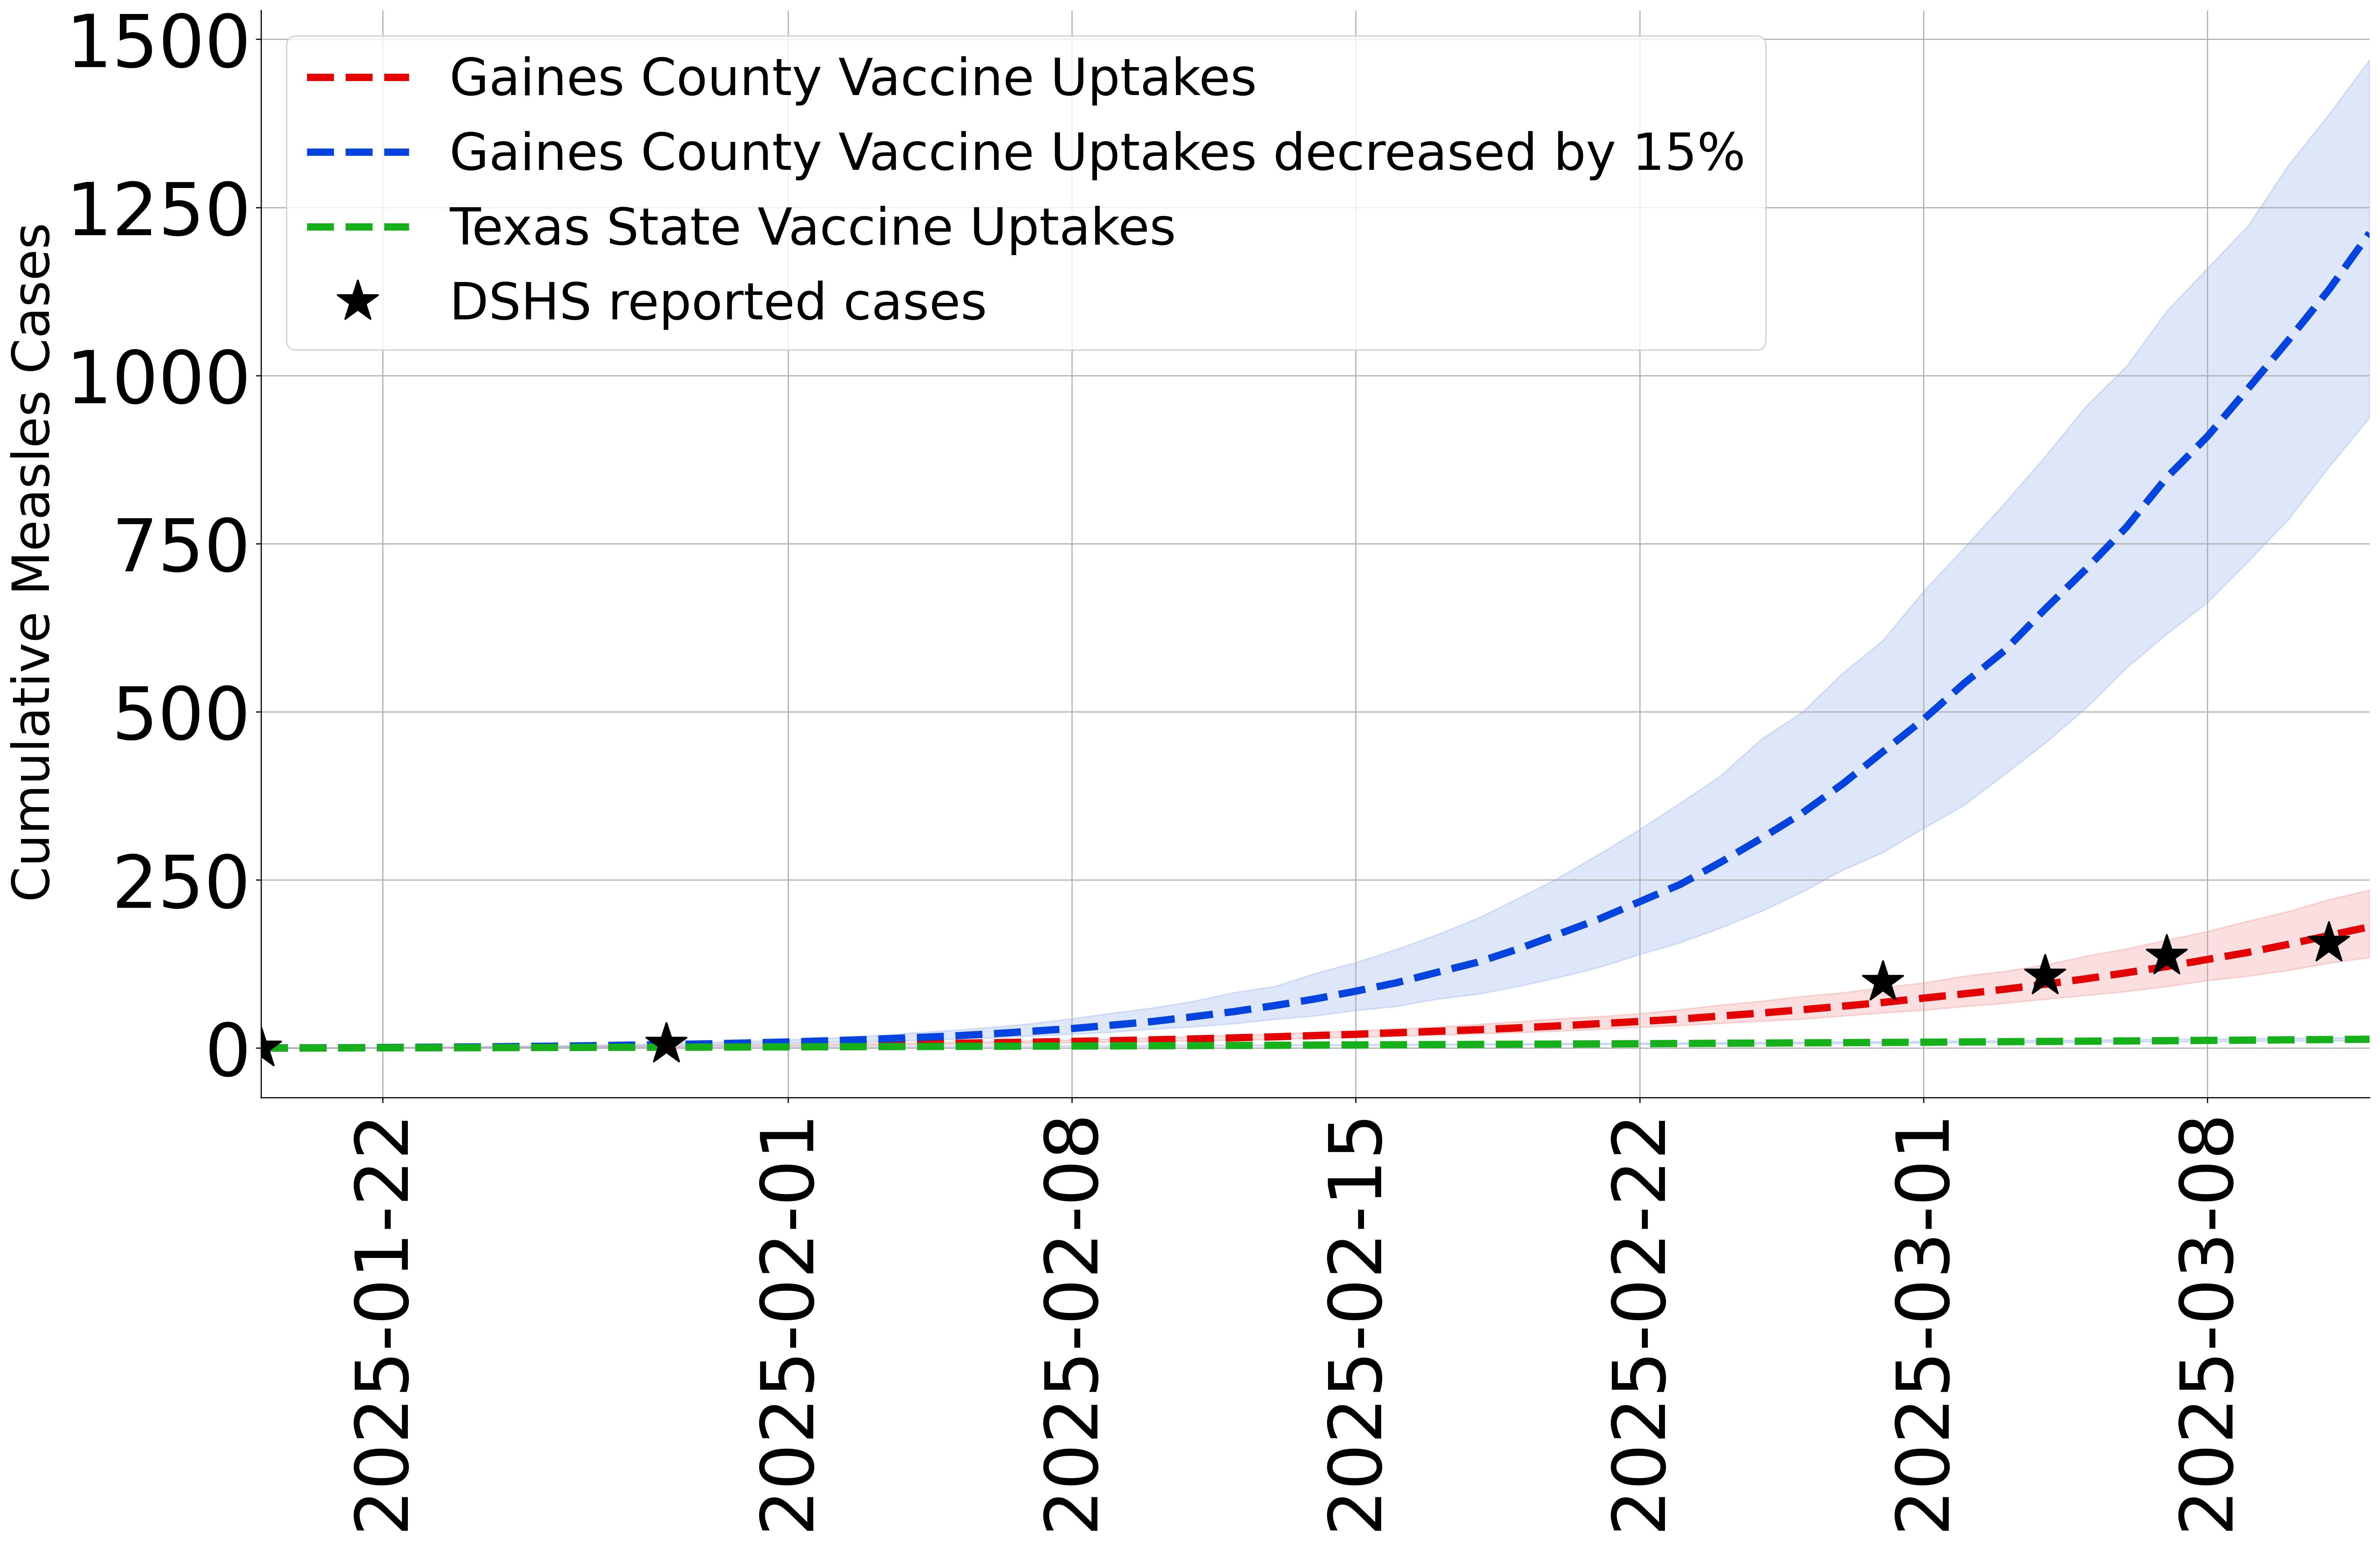

In [21]:
drange1 = pd.date_range("2025-01-19", periods=53, freq="1D")
fig = plt.figure(num=None, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, cum_Inf_p_A[:,2], cum_Inf_p_A[:,22], color='xkcd:red', alpha=0.13)
plt.plot(drange1, cum_Inf_p_A[:,12], '--', color='xkcd:red', lw=5, label = 'Gaines County Vaccine Uptakes')

plt.fill_between(drange1, cum_Inf_p_B[:,2], cum_Inf_p_B[:,22], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, cum_Inf_p_B[:,12], '--', color='xkcd:blue', lw=5, label = 'Gaines County Vaccine Uptakes decreased by 15%')

plt.fill_between(drange1, cum_Inf_p_C[:,2], cum_Inf_p_C[:,22], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, cum_Inf_p_C[:,12], '--', color='xkcd:green', lw=5, label = 'Texas State Vaccine Uptakes')

dates = pd.to_datetime(GC['Update Date']).dt.to_pydatetime()
plt.plot(dates, GC['Cumulative Cases'], '*', color='black', markersize=30, label = 'DSHS reported cases')

plt.xticks(rotation=90)
plt.ylabel('Cumulative Measles Cases ', fontsize = 35)
plt.legend(fontsize=35,loc='upper left');
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()

C:\Users\17857\AppData\Local\Temp\ipykernel_8576\2062194199.py:23: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  dates = pd.to_datetime(GC['Update Date']).dt.to_pydatetime()


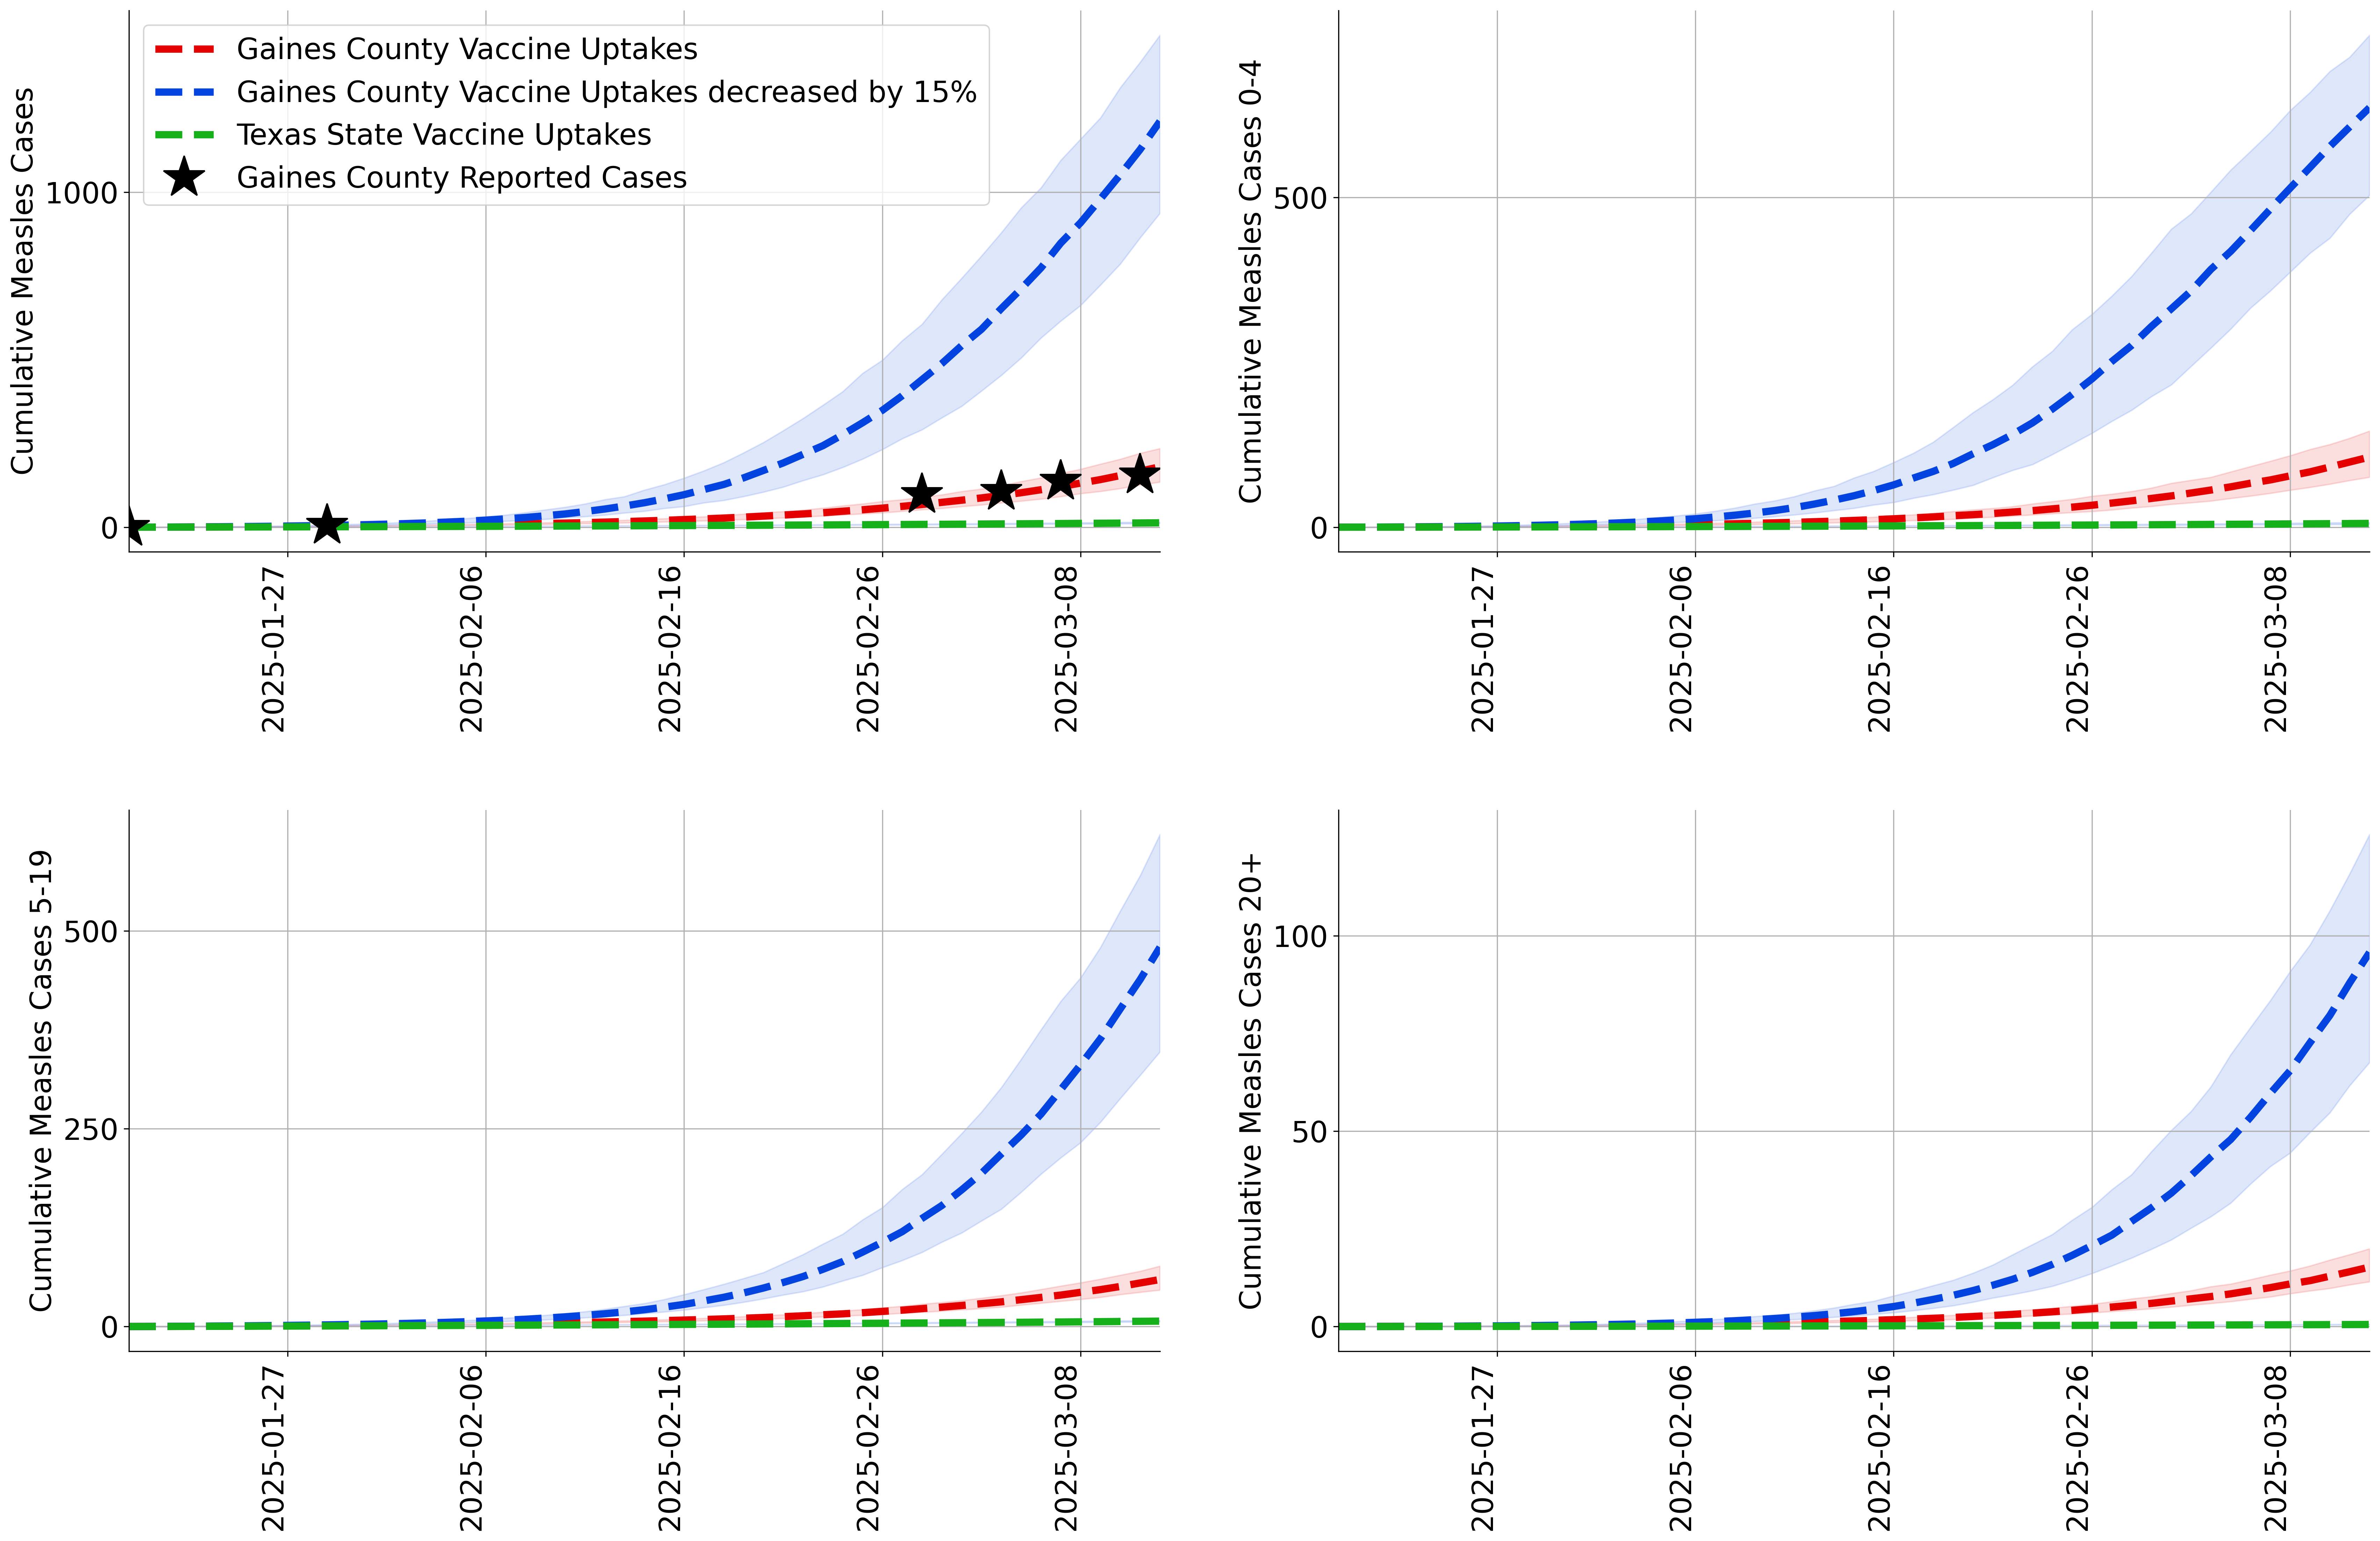

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define the 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})  # Keep font size consistent

# First subplot (Top-Left: Your current plot)
ax = axs[0, 0]

drange1 = pd.date_range("2025-01-19", periods=53, freq="1D")

ax.fill_between(drange1, cum_Inf_p_A[:, 2], cum_Inf_p_A[:, 22], color='xkcd:red', alpha=0.13)
ax.plot(drange1, cum_Inf_p_A[:, 12], '--', color='xkcd:red', lw=5, label='Gaines County Vaccine Uptakes')

ax.fill_between(drange1, cum_Inf_p_B[:, 2], cum_Inf_p_B[:, 22], color='xkcd:blue', alpha=0.13)
ax.plot(drange1, cum_Inf_p_B[:, 12], '--', color='xkcd:blue', lw=5, label='Gaines County Vaccine Uptakes decreased by 15%')

ax.fill_between(drange1, cum_Inf_p_C[:,2], cum_Inf_p_C[:,22], color='xkcd:blue', alpha=0.13)
ax.plot(drange1, cum_Inf_p_C[:,12], '--', color='xkcd:green', lw=5, label = 'Texas State Vaccine Uptakes')

dates = pd.to_datetime(GC['Update Date']).dt.to_pydatetime()
ax.plot(dates, GC['Cumulative Cases'], '*', color='black', markersize=30, label='Gaines County Reported Cases')

# Format x-axis to only show date
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Show only date
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show every 5th day (adjustable)
plt.setp(ax.xaxis.get_majorticklabels(), fontsize=20, rotation=90, ha="right")  # Rotate for readability
plt.setp(ax.yaxis.get_majorticklabels(), fontsize=20) 

ax.set_ylabel('Cumulative Measles Cases', fontsize=20)
ax.legend(fontsize=20, loc='upper left')
ax.autoscale(enable=True, axis='x', tight=True)
ax.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = axs[0, 1]

ax1.fill_between(drange1, cum_Inf0_p_A[:, 2], cum_Inf0_p_A[:, 22], color='xkcd:red', alpha=0.13)
ax1.plot(drange1, cum_Inf0_p_A[:, 12], '--', color='xkcd:red', lw=5, label='Baseline Vaccine Uptake')

ax1.fill_between(drange1, cum_Inf0_p_B[:, 2], cum_Inf0_p_B[:, 22], color='xkcd:blue', alpha=0.13)
ax1.plot(drange1, cum_Inf0_p_B[:, 12], '--', color='xkcd:blue', lw=5, label='Annual Vaccine Uptake Reduced by 15%')

ax1.fill_between(drange1, cum_Inf0_p_C[:,2], cum_Inf0_p_C[:,22], color='xkcd:blue', alpha=0.13)
ax1.plot(drange1, cum_Inf0_p_C[:,12], '--', color='xkcd:green', lw=5, label = 'Average vaccine uptake across Texas')

# Format x-axis to only show date
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Show only date
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show every 5th day (adjustable)
plt.setp(ax1.xaxis.get_majorticklabels(), fontsize=20, rotation=90, ha="right")  # Rotate for readability
plt.setp(ax1.yaxis.get_majorticklabels(), fontsize=20) 

ax1.set_ylabel('Cumulative Measles Cases 0-4', fontsize=20)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid()

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = axs[1, 0]

ax2.fill_between(drange1, cum_Inf1_p_A[:, 2], cum_Inf1_p_A[:, 22], color='xkcd:red', alpha=0.13)
ax2.plot(drange1, cum_Inf1_p_A[:, 12], '--', color='xkcd:red', lw=5, label='Baseline Vaccine Uptake')

ax2.fill_between(drange1, cum_Inf1_p_B[:, 2], cum_Inf1_p_B[:, 22], color='xkcd:blue', alpha=0.13)
ax2.plot(drange1, cum_Inf1_p_B[:, 12], '--', color='xkcd:blue', lw=5, label='Annual Vaccine Uptake Reduced by 15%')

ax2.fill_between(drange1, cum_Inf1_p_C[:,2], cum_Inf1_p_C[:,22], color='xkcd:blue', alpha=0.13)
ax2.plot(drange1, cum_Inf1_p_C[:,12], '--', color='xkcd:green', lw=5, label = 'Average vaccine uptake across Texas')

# Format x-axis to only show date
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Show only date
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show every 5th day (adjustable)
plt.setp(ax2.xaxis.get_majorticklabels(), fontsize=20, rotation=90, ha="right")  # Rotate for readability
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=20) 

ax2.set_ylabel('Cumulative Measles Cases 5-19', fontsize=20)
ax2.autoscale(enable=True, axis='x', tight=True)
ax2.grid()

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax3 = axs[1, 1]

ax3.fill_between(drange1, cum_Inf2_p_A[:, 2], cum_Inf2_p_A[:, 22], color='xkcd:red', alpha=0.13)
ax3.plot(drange1, cum_Inf2_p_A[:, 12], '--', color='xkcd:red', lw=5, label='Baseline Vaccine Uptake')

ax3.fill_between(drange1, cum_Inf2_p_B[:, 2], cum_Inf2_p_B[:, 22], color='xkcd:blue', alpha=0.13)
ax3.plot(drange1, cum_Inf2_p_B[:, 12], '--', color='xkcd:blue', lw=5, label='Annual Vaccine Uptake Reduced by 15%')

ax3.fill_between(drange1, cum_Inf2_p_C[:,2], cum_Inf2_p_C[:,22], color='xkcd:blue', alpha=0.13)
ax3.plot(drange1, cum_Inf2_p_C[:,12], '--', color='xkcd:green', lw=5, label = 'Average vaccine uptake across Texas')

# Format x-axis to only show date
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Show only date
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show every 5th day (adjustable)
plt.setp(ax3.xaxis.get_majorticklabels(), fontsize=20, rotation=90, ha="right")  # Rotate for readability
plt.setp(ax3.yaxis.get_majorticklabels(), fontsize=20) 

ax3.set_ylabel('Cumulative Measles Cases 20+', fontsize=20)
ax3.autoscale(enable=True, axis='x', tight=True)
ax3.grid()

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

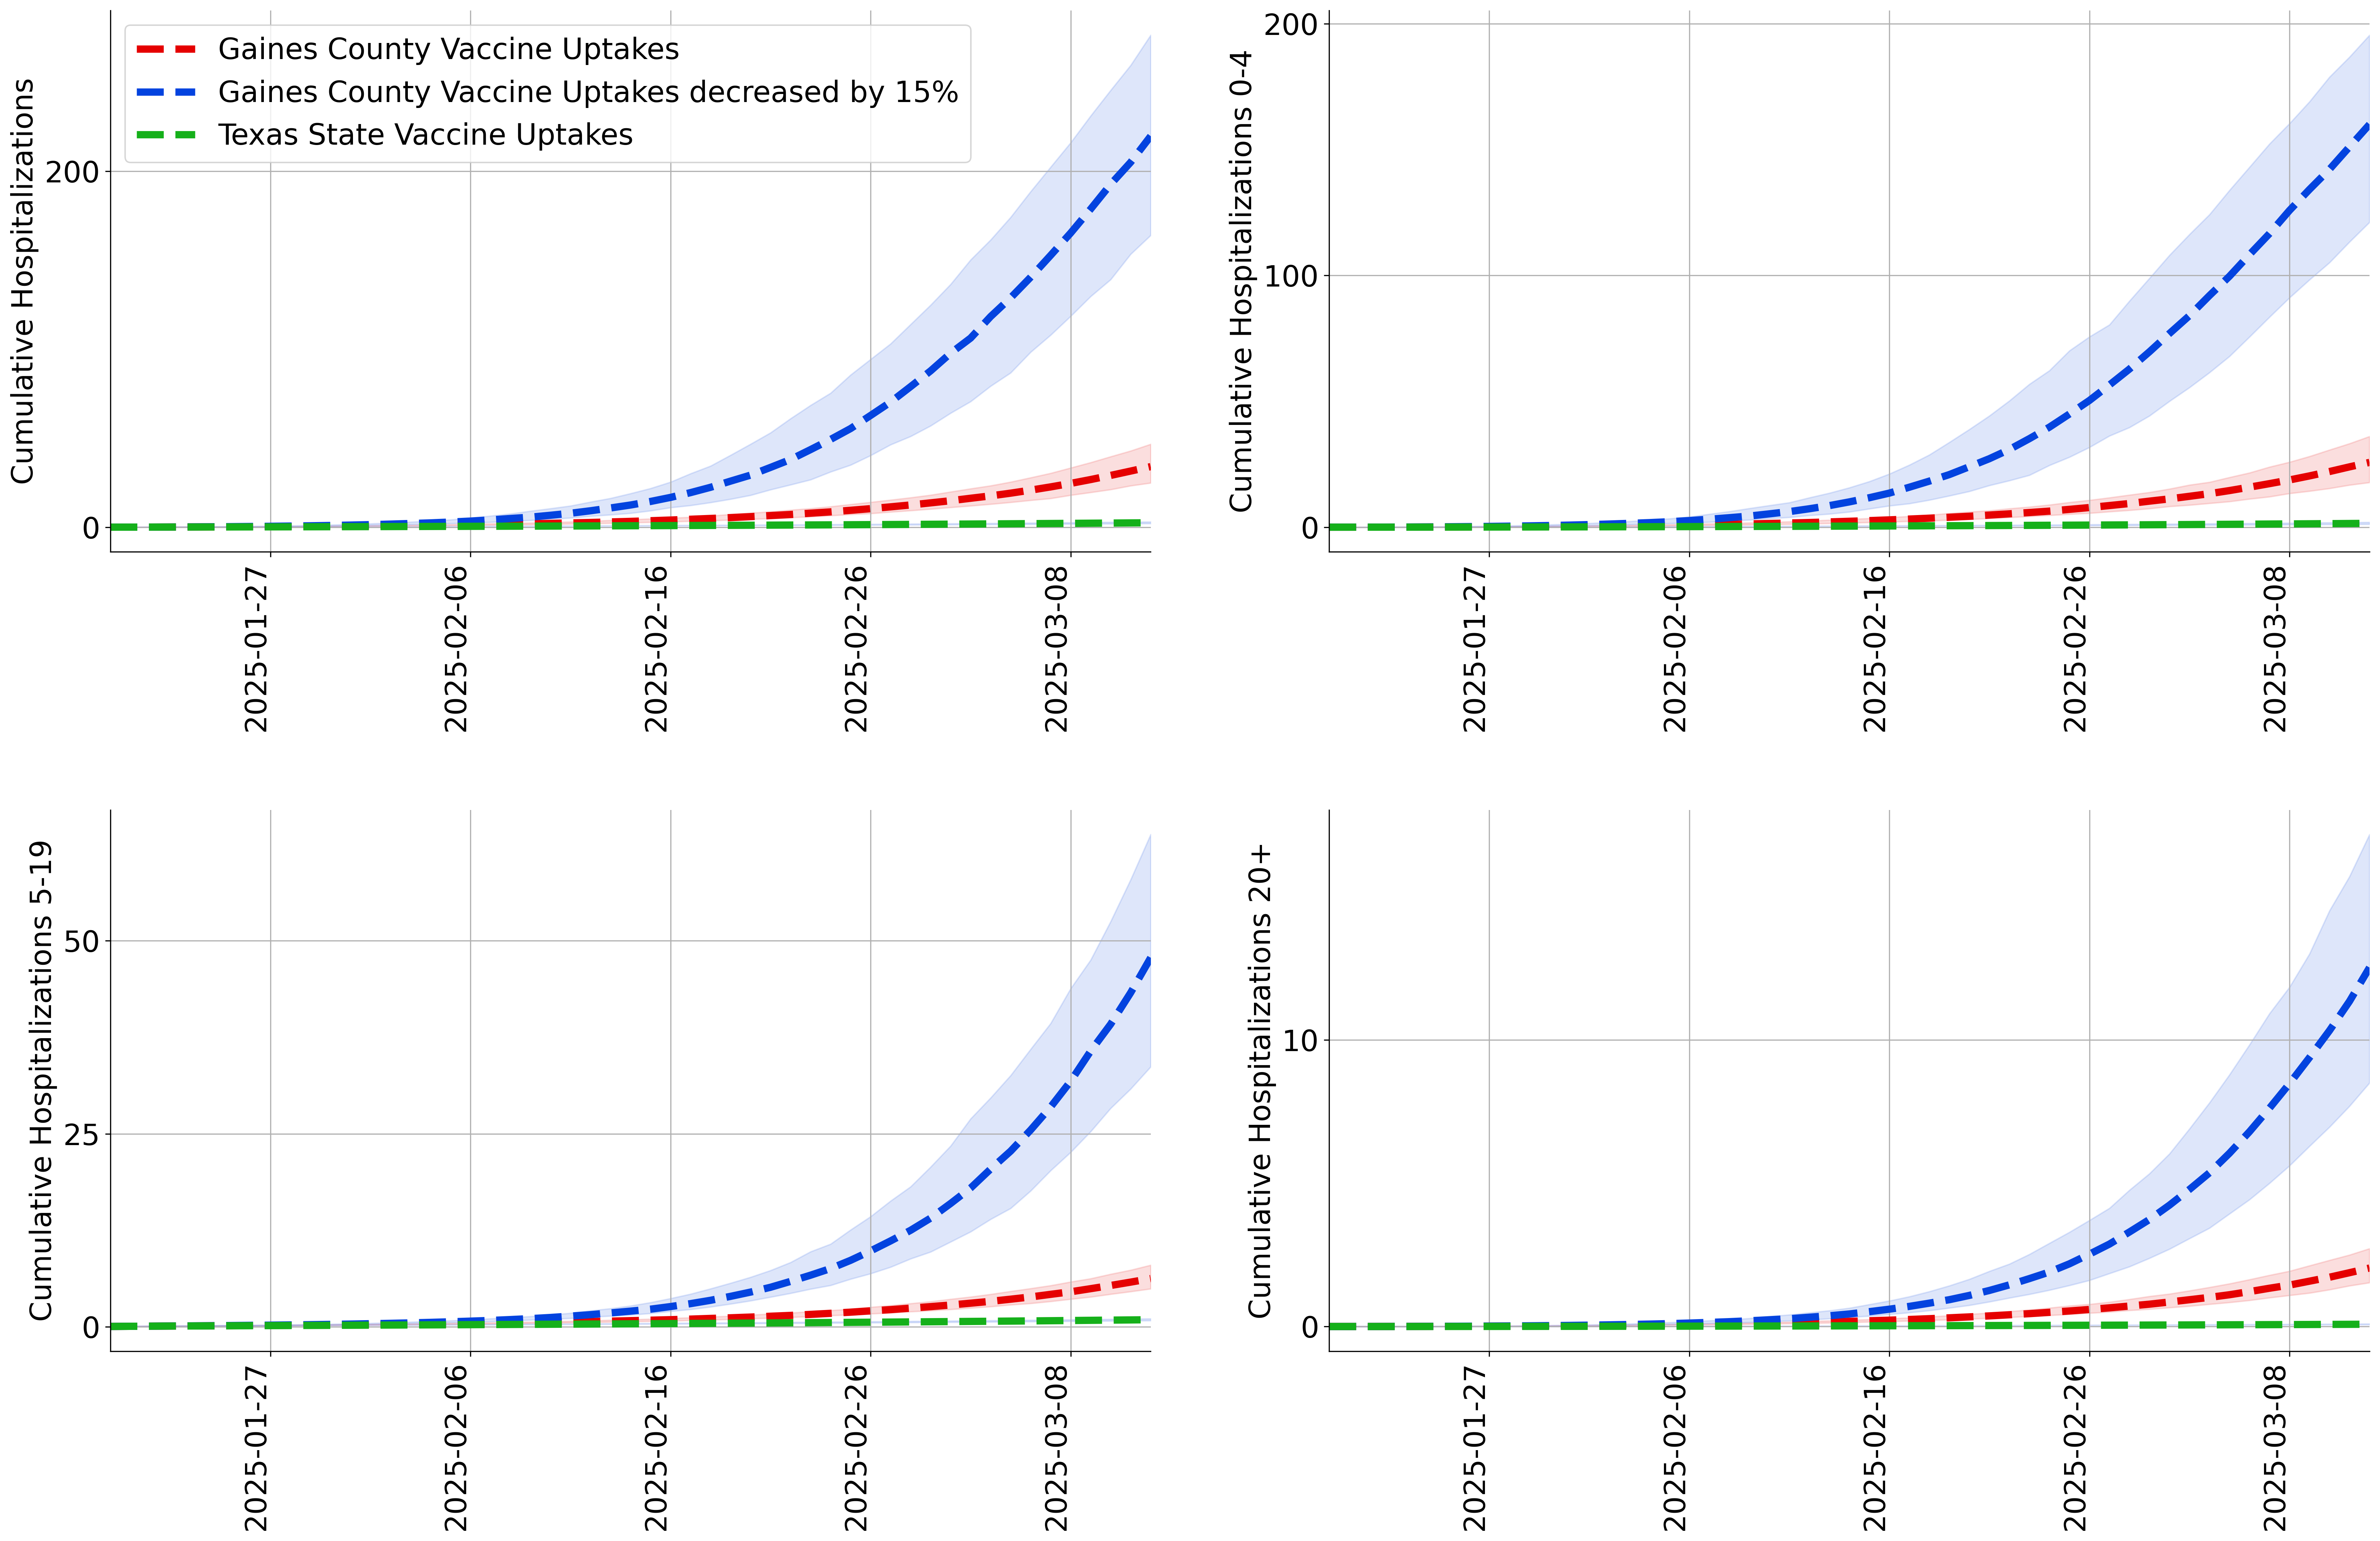

In [24]:
# Define the 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})  # Keep font size consistent

# First subplot (Top-Left: Your current plot)
ax = axs[0, 0]

drange1 = pd.date_range("2025-01-19", periods=53, freq="1D")

ax.fill_between(drange1, cum_Hosp_p_A[:, 2], cum_Hosp_p_A[:, 22], color='xkcd:red', alpha=0.13)
ax.plot(drange1, cum_Hosp_p_A[:, 12], '--', color='xkcd:red', lw=5, label='Gaines County Vaccine Uptakes')

ax.fill_between(drange1, cum_Hosp_p_B[:, 2], cum_Hosp_p_B[:, 22], color='xkcd:blue', alpha=0.13)
ax.plot(drange1, cum_Hosp_p_B[:, 12], '--', color='xkcd:blue', lw=5, label='Gaines County Vaccine Uptakes decreased by 15%')

ax.fill_between(drange1, cum_Hosp_p_C[:,2], cum_Hosp_p_C[:,22], color='xkcd:blue', alpha=0.13)
ax.plot(drange1, cum_Hosp_p_C[:,12], '--', color='xkcd:green', lw=5, label = 'Texas State Vaccine Uptakes')

# Format x-axis to only show date
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Show only date
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show every 5th day (adjustable)
plt.setp(ax.xaxis.get_majorticklabels(), fontsize=20, rotation=90, ha="right")  # Rotate for readability
plt.setp(ax.yaxis.get_majorticklabels(), fontsize=20) 

ax.set_ylabel('Cumulative Hospitalizations', fontsize=20)
ax.legend(fontsize=20, loc='upper left')
ax.autoscale(enable=True, axis='x', tight=True)
ax.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = axs[0, 1]

ax1.fill_between(drange1, cum_Hosp0_p_A[:, 2], cum_Hosp0_p_A[:, 22], color='xkcd:red', alpha=0.13)
ax1.plot(drange1, cum_Hosp0_p_A[:, 12], '--', color='xkcd:red', lw=5, label='Baseline Vaccine Uptake')

ax1.fill_between(drange1, cum_Hosp0_p_B[:, 2], cum_Hosp0_p_B[:, 22], color='xkcd:blue', alpha=0.13)
ax1.plot(drange1, cum_Hosp0_p_B[:, 12], '--', color='xkcd:blue', lw=5, label='Annual Vaccine Uptake Reduced by 15%')

ax1.fill_between(drange1, cum_Hosp0_p_C[:,2], cum_Hosp0_p_C[:,22], color='xkcd:blue', alpha=0.13)
ax1.plot(drange1, cum_Hosp0_p_C[:,12], '--', color='xkcd:green', lw=5, label = 'Average vaccine uptake across Texas')

# Format x-axis to only show date
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Show only date
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show every 5th day (adjustable)
plt.setp(ax1.xaxis.get_majorticklabels(), fontsize=20, rotation=90, ha="right")  # Rotate for readability
plt.setp(ax1.yaxis.get_majorticklabels(), fontsize=20) 

ax1.set_ylabel('Cumulative Hospitalizations 0-4', fontsize=20)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid()

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = axs[1, 0]

ax2.fill_between(drange1, cum_Hosp1_p_A[:, 2], cum_Hosp1_p_A[:, 22], color='xkcd:red', alpha=0.13)
ax2.plot(drange1, cum_Hosp1_p_A[:, 12], '--', color='xkcd:red', lw=5, label='Baseline Vaccine Uptake')

ax2.fill_between(drange1, cum_Hosp1_p_B[:, 2], cum_Hosp1_p_B[:, 22], color='xkcd:blue', alpha=0.13)
ax2.plot(drange1, cum_Hosp1_p_B[:, 12], '--', color='xkcd:blue', lw=5, label='Annual Vaccine Uptake Reduced by 15%')

ax2.fill_between(drange1, cum_Hosp1_p_C[:,2], cum_Hosp1_p_C[:,22], color='xkcd:blue', alpha=0.13)
ax2.plot(drange1, cum_Hosp1_p_C[:,12], '--', color='xkcd:green', lw=5, label = 'Average vaccine uptake across Texas')

# Format x-axis to only show date
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Show only date
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show every 5th day (adjustable)
plt.setp(ax2.xaxis.get_majorticklabels(), fontsize=20, rotation=90, ha="right")  # Rotate for readability
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=20) 

ax2.set_ylabel('Cumulative Hospitalizations 5-19', fontsize=20)
ax2.autoscale(enable=True, axis='x', tight=True)
ax2.grid()

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax3 = axs[1, 1]

ax3.fill_between(drange1, cum_Hosp2_p_A[:, 2], cum_Hosp2_p_A[:, 22], color='xkcd:red', alpha=0.13)
ax3.plot(drange1, cum_Hosp2_p_A[:, 12], '--', color='xkcd:red', lw=5, label='Baseline Vaccine Uptake')

ax3.fill_between(drange1, cum_Hosp2_p_B[:, 2], cum_Hosp2_p_B[:, 22], color='xkcd:blue', alpha=0.13)
ax3.plot(drange1, cum_Hosp2_p_B[:, 12], '--', color='xkcd:blue', lw=5, label='Annual Vaccine Uptake Reduced by 15%')

ax3.fill_between(drange1, cum_Hosp2_p_C[:,2], cum_Hosp2_p_C[:,22], color='xkcd:blue', alpha=0.13)
ax3.plot(drange1, cum_Hosp2_p_C[:,12], '--', color='xkcd:green', lw=5, label = 'Average vaccine uptake across Texas')

# Format x-axis to only show date
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Show only date
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show every 5th day (adjustable)
plt.setp(ax3.xaxis.get_majorticklabels(), fontsize=20, rotation=90, ha="right")  # Rotate for readability
plt.setp(ax3.yaxis.get_majorticklabels(), fontsize=20) 

ax3.set_ylabel('Cumulative Hospitalizations 20+', fontsize=20)
ax3.autoscale(enable=True, axis='x', tight=True)
ax3.grid()

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

C:\Users\17857\AppData\Local\Temp\ipykernel_8576\2218096795.py:27: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  dates = pd.to_datetime(GC['Update Date']).dt.to_pydatetime()


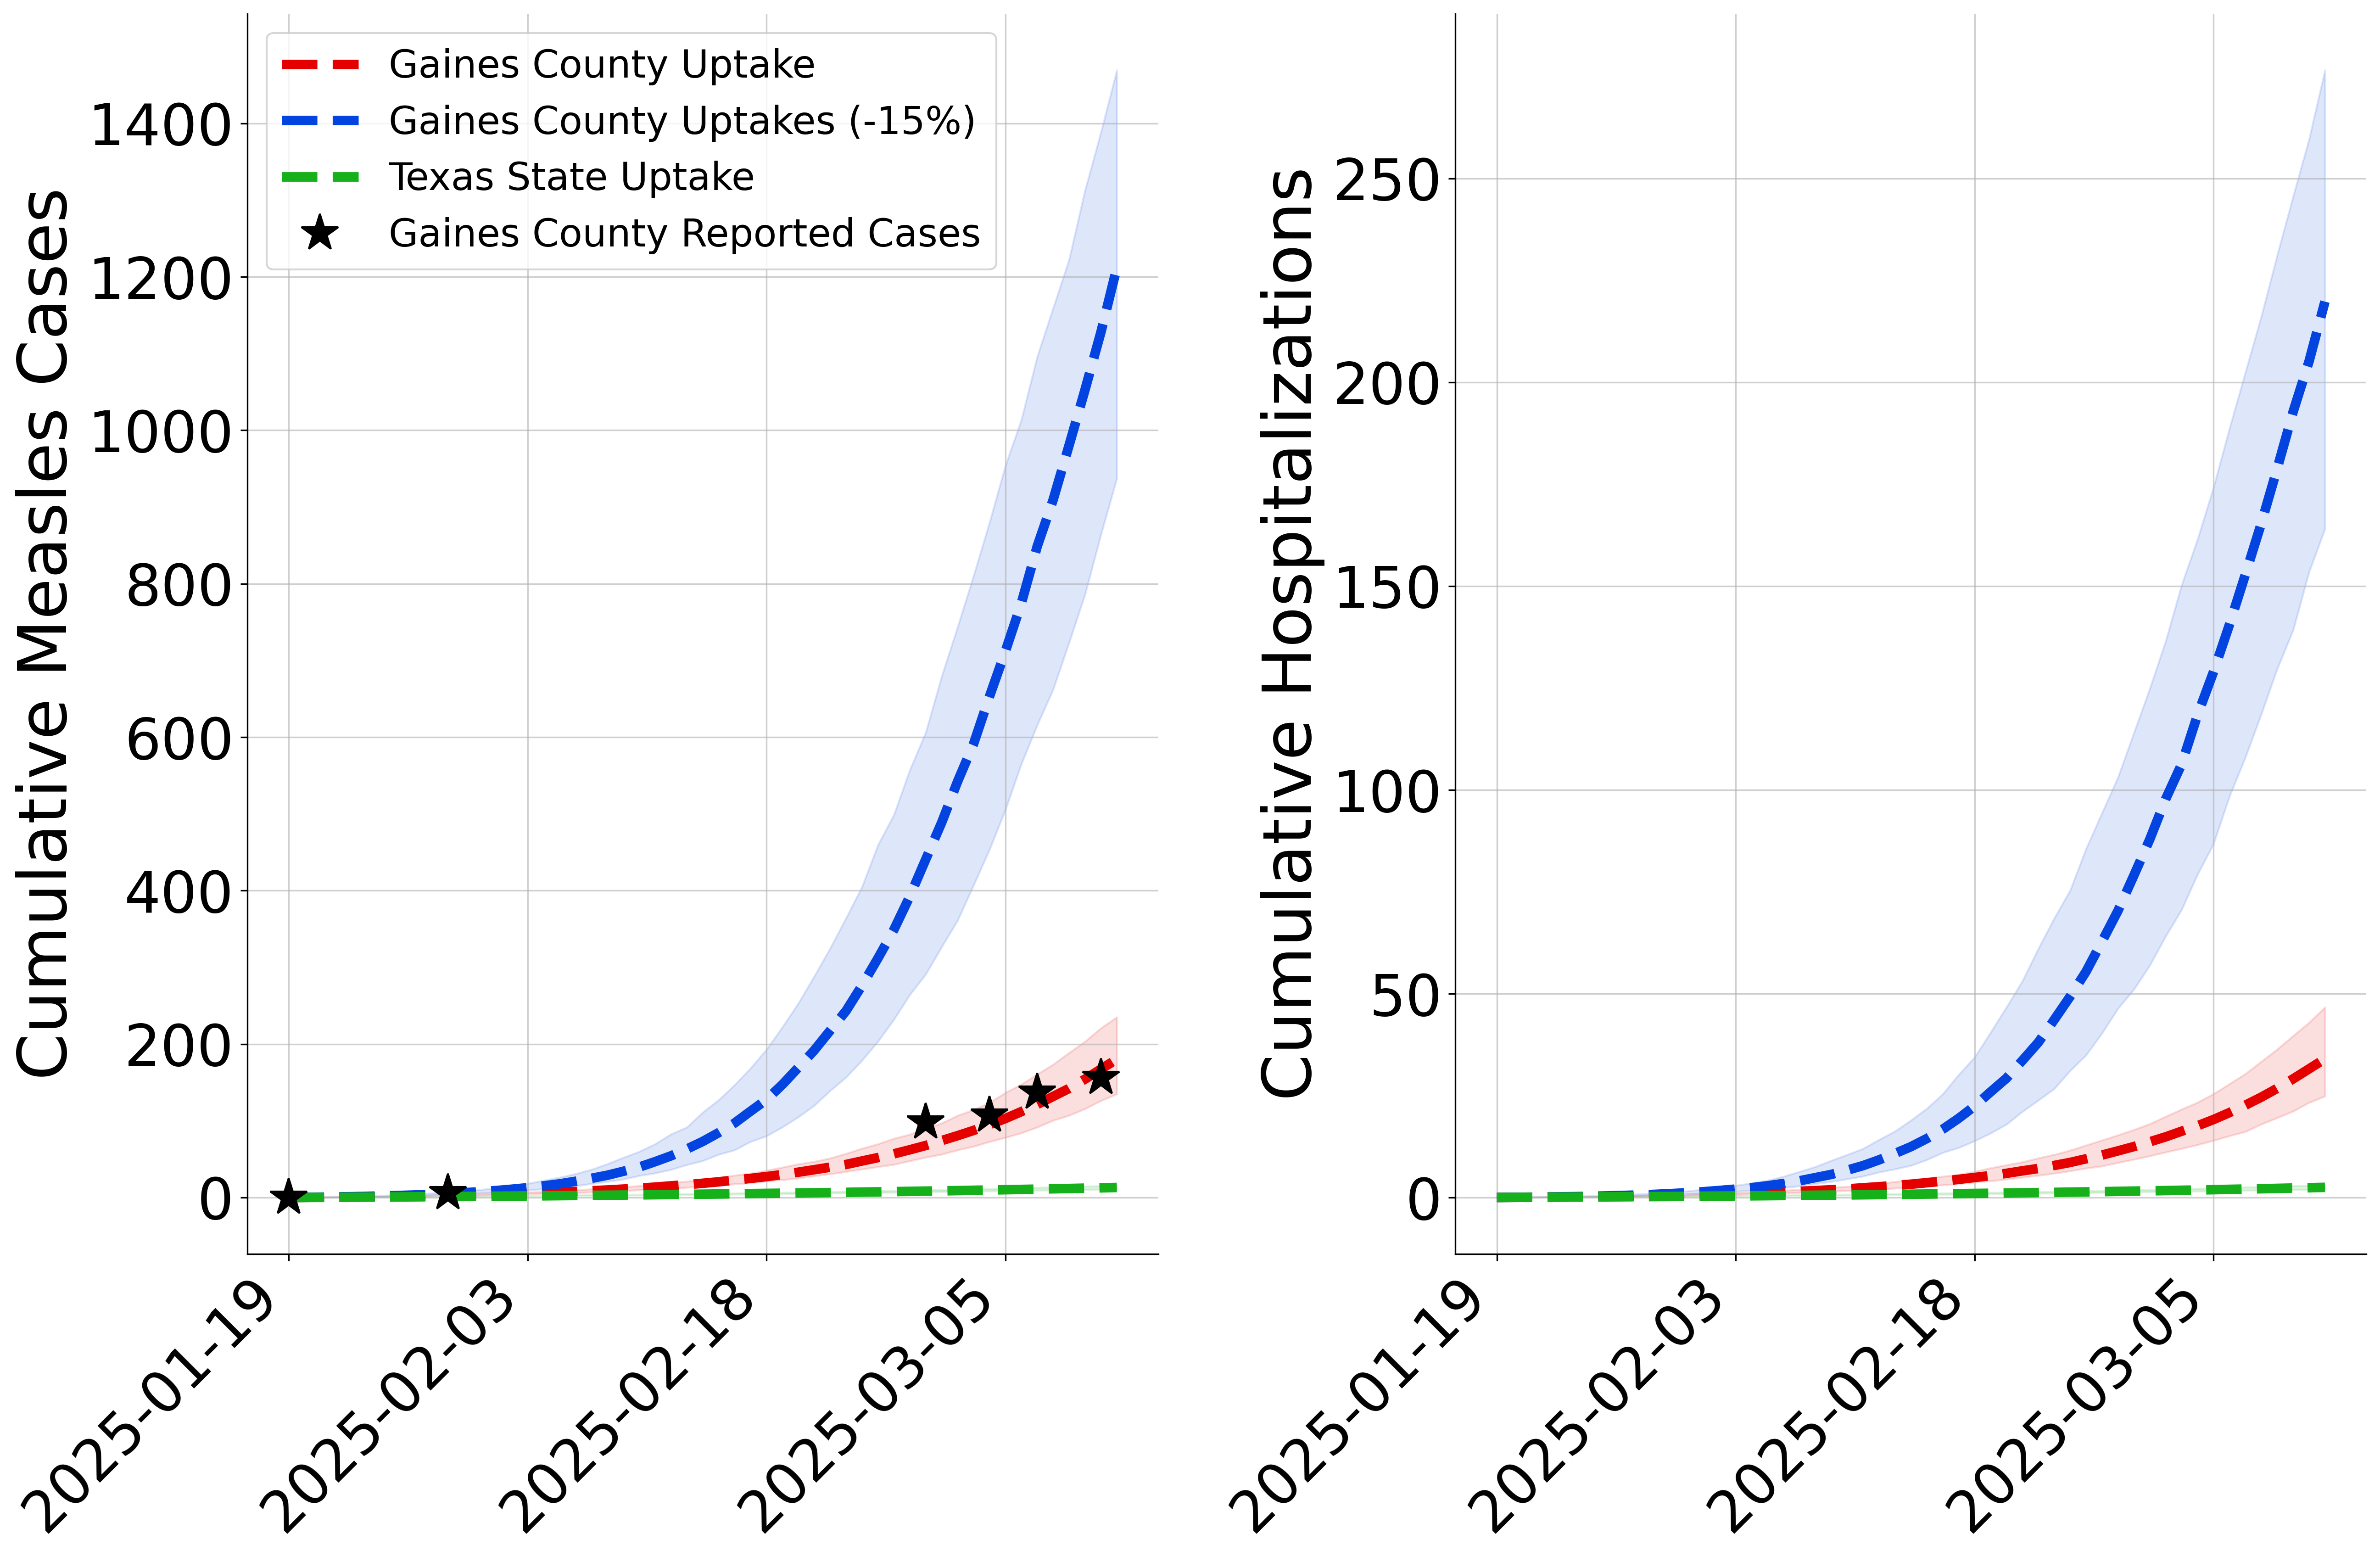

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Define the 1x2 subplot layout
fig, axs = plt.subplots(1, 2, figsize=(18,12), dpi=300, facecolor='w', edgecolor='k')

# Global font settings
plt.rcParams.update({'font.size': 30})  # Consistent large font for readability

# Define date range
drange1 = pd.date_range("2025-01-19", periods=53, freq="1D")

# --- First subplot: Cumulative Cases ---
ax = axs[0]

ax.fill_between(drange1, cum_Inf_p_A[:, 2], cum_Inf_p_A[:, 22], color='xkcd:red', alpha=0.13)
ax.plot(drange1, cum_Inf_p_A[:, 12], '--', color='xkcd:red', lw=5, label='Gaines County Uptake')

ax.fill_between(drange1, cum_Inf_p_B[:, 2], cum_Inf_p_B[:, 22], color='xkcd:blue', alpha=0.13)
ax.plot(drange1, cum_Inf_p_B[:, 12], '--', color='xkcd:blue', lw=5, label='Gaines County Uptakes (-15%)')

ax.fill_between(drange1, cum_Inf_p_C[:, 2], cum_Inf_p_C[:, 22], color='xkcd:green', alpha=0.13)
ax.plot(drange1, cum_Inf_p_C[:, 12], '--', color='xkcd:green', lw=5, label='Texas State Uptake')

# Reported cases as black stars
dates = pd.to_datetime(GC['Update Date']).dt.to_pydatetime()
ax.plot(dates, GC['Cumulative Cases'], '*', color='black', markersize=20, label='Gaines County Reported Cases')

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Show every 15th day
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotate for readability

ax.set_ylabel('Cumulative Measles Cases', fontsize=35)
ax.legend(fontsize=20, loc='upper left')
ax.grid(alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Second subplot: Cumulative Hospitalizations ---
ax1 = axs[1]

ax1.fill_between(drange1, cum_Hosp_p_A[:, 2], cum_Hosp_p_A[:, 22], color='xkcd:red', alpha=0.13)
ax1.plot(drange1, cum_Hosp_p_A[:, 12], '--', color='xkcd:red', lw=5, label='Gaines County Vaccine Uptakes')

ax1.fill_between(drange1, cum_Hosp_p_B[:, 2], cum_Hosp_p_B[:, 22], color='xkcd:blue', alpha=0.13)
ax1.plot(drange1, cum_Hosp_p_B[:, 12], '--', color='xkcd:blue', lw=5, label='Gaines County Vaccine Uptakes decreased by 15%')

ax1.fill_between(drange1, cum_Hosp_p_C[:, 2], cum_Hosp_p_C[:, 22], color='xkcd:green', alpha=0.13)
ax1.plot(drange1, cum_Hosp_p_C[:, 12], '--', color='xkcd:green', lw=5, label='Texas State Vaccine Uptakes')

# Format x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Show every 15th day
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotate for readability

ax1.set_ylabel('Cumulative Hospitalizations', fontsize=35)
#ax1.legend(fontsize=24, loc='upper left')
ax1.grid(alpha=0.6)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [27]:
print(cum_Inf_p_A[49, 2]-cum_Inf_p_B[49, 2])
print(cum_Inf_p_A[49, 12]-cum_Inf_p_B[49, 12])
print(cum_Inf_p_A[49, 22]-cum_Inf_p_B[49, 22])

-616.208173212437
-838.1089438410295
-1033.772413608906


In [28]:
print(cum_Inf_p_A[49, 2]-cum_Inf_p_C[49, 2])
print(cum_Inf_p_A[49, 12]-cum_Inf_p_C[49, 12])
print(cum_Inf_p_A[49, 22]-cum_Inf_p_C[49, 22])

96.9731223556619
130.4011556310486
174.5504095309279
